In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = r"C:\Users\PC\Desktop\HandsOnMachineLeanring\HandsOnMachineLearning"
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear Regression using the Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


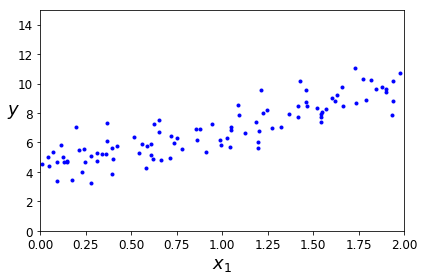

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new  = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure An example of X_new and y


<function matplotlib.pyplot.show(*args, **kw)>

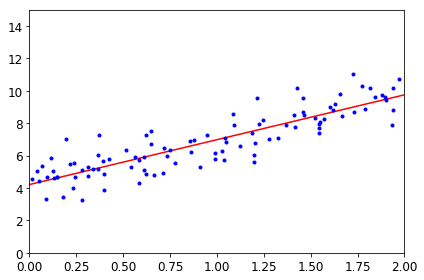

In [7]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
save_fig("An example of X_new and y")
plt.show

Saving figure linear_model_predictions


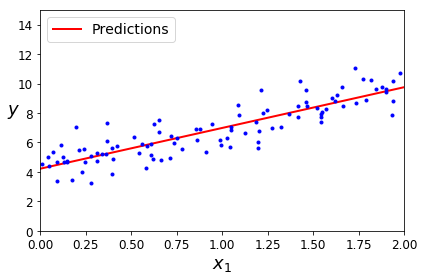

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Linear Regression using batch gradient descent

In [11]:
learning_rate  = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [12]:
theta

array([[0.01300189],
       [1.45353408]])

In [13]:
X_new_b.dot(theta)

array([[0.01300189],
       [2.92007005]])

In [14]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradients

In [16]:
theta

array([[4.21509616],
       [2.77011339]])

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize= 18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$ ".format(eta), fontsize = 16 )

Saving figure gradient_descent_plot


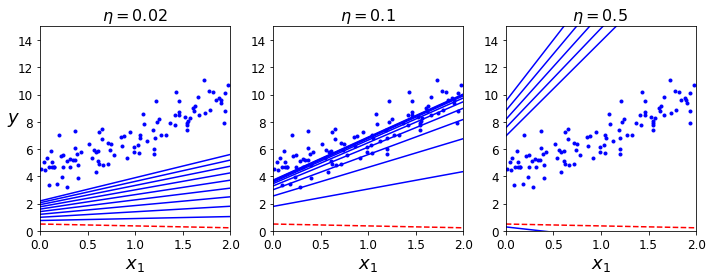

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta , eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

save_fig("gradient_descent_plot")
plt.show()

# Stochastic Gradient Descent

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

Saving figure sgd_plot


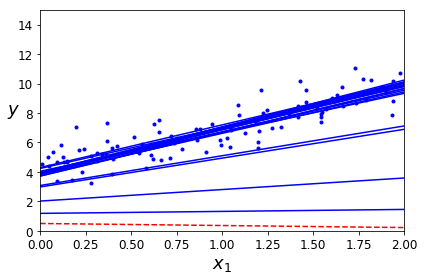

In [20]:
for epoch in range (n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new,y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta   = learning_schedule(epoch *m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [21]:
theta
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 100, tol = -np.infty, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22159499]), array([2.7805861]))

# Mini-Batch Gradient Descent

In [30]:
theta_path_mbg = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) 

t0, t1 = 200,1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffle_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffle_indices]
    y_shuffled = y[shuffle_indices] 
    for i in range(0,m,minibatch_size): #this i is ranging from the 0->m step size = minibatch_size
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradients
        theta_path_mbg.append(theta)

In [32]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [51]:
theta_path_mbg[249]

array([[4.25214635],
       [2.7896408 ]])

In [54]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbg = np.array(theta_path_mbg)

C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "Upper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Saving figure Gradient descent paths plot


<function matplotlib.pyplot.show(*args, **kw)>

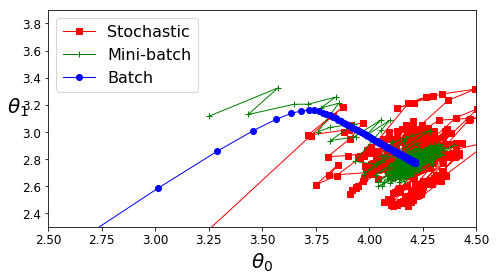

In [57]:
plt.figure(figsize = (7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r-s", linewidth = 1, label = "Stochastic")
plt.plot(theta_path_mbg[:,0], theta_path_mbg[:,1], "g-+", linewidth = 1, label = "Mini-batch")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "b-o", linewidth = 1, label = "Batch")
plt.legend(loc = "Upper left", fontsize = 16)
plt.xlabel(r"$\theta_0$", fontsize = 20)
plt.ylabel(r"$\theta_1$", fontsize = 20, rotation = 0)
plt.axis([2.5,4.5,2.3,3.9])
save_fig("Gradient descent paths plot")
plt.show

# Polynomial Regression

Saving figure quadratic_data_plot


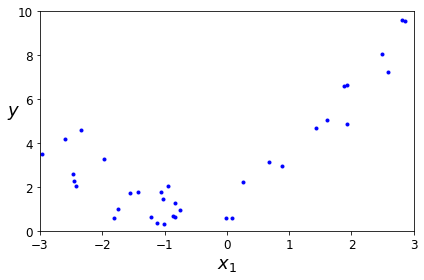

In [116]:
import numpy as np
import numpy.random as rnd
np.random.seed(42)

m = 100
X = 6*np.random.randn(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [117]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.01971508])

In [118]:
X_poly[0]

array([-0.01971508,  0.00038868])

In [119]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

Saving figure Quadratic prediction plot


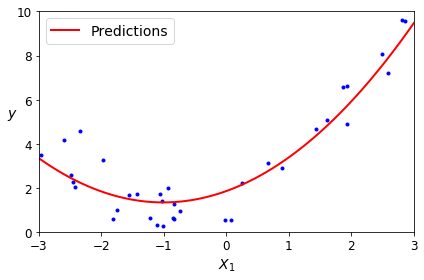

In [120]:
X_new = np.linspace(-3,3,100).reshape(100,1) # Gen new data
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-", linewidth = 2, label ="Predictions")
plt.xlabel("$X_1$")
plt.ylabel("$y$",rotation = 0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3,3,0,10])
save_fig("Quadratic prediction plot")
plt.show()

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial)
C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


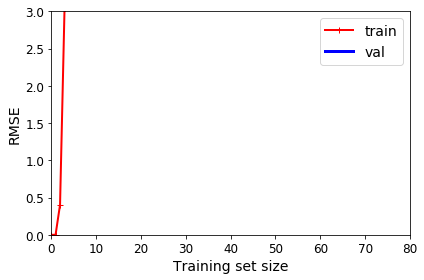

In [125]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()     

Saving figure learning_curves_plot


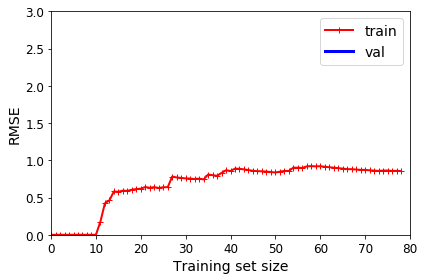

In [126]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

# Regularizied Models

In [131]:
from sklearn.linear_model import Ridge


np.random.seed(42)
m  = 20
X = 3*np.random.rand(m,1)
y = 1 + 0.5* X  + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100)

In [134]:
X_new.reshape(100,1)

array([[0.        ],
       [0.03030303],
       [0.06060606],
       [0.09090909],
       [0.12121212],
       [0.15151515],
       [0.18181818],
       [0.21212121],
       [0.24242424],
       [0.27272727],
       [0.3030303 ],
       [0.33333333],
       [0.36363636],
       [0.39393939],
       [0.42424242],
       [0.45454545],
       [0.48484848],
       [0.51515152],
       [0.54545455],
       [0.57575758],
       [0.60606061],
       [0.63636364],
       [0.66666667],
       [0.6969697 ],
       [0.72727273],
       [0.75757576],
       [0.78787879],
       [0.81818182],
       [0.84848485],
       [0.87878788],
       [0.90909091],
       [0.93939394],
       [0.96969697],
       [1.        ],
       [1.03030303],
       [1.06060606],
       [1.09090909],
       [1.12121212],
       [1.15151515],
       [1.18181818],
       [1.21212121],
       [1.24242424],
       [1.27272727],
       [1.3030303 ],
       [1.33333333],
       [1.36363636],
       [1.39393939],
       [1.424

Saving figure ridge_regression_plot


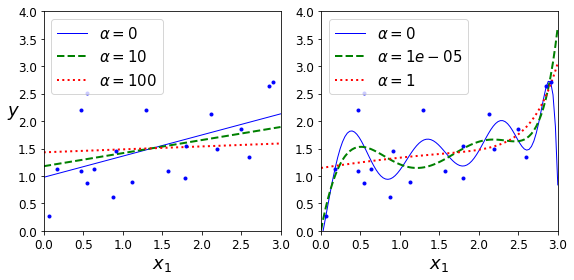

In [139]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

# Lasso Regression

In [140]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

# Elastic Net

In [141]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = .1, l1_ratio = .5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [152]:
np.random.seed(42)
m  = 100
X = 6*np.random.rand(m,1) - 3
y = 2 + X + 0.5*X**2 + np.random.randn(m,1)

X_train, X_val, y_train,y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # Generating a train matrix with for degree 90
X_val_poly_scaled = poly_scaler.fit_transform(X_val) # Generating a train matrix with for degree 90


sgd_reg = SGDRegressor(max_iter=1,
                      tol= -np.infty,
                      penalty = None,
                      eta0 = 0.0005,
                      warm_start=True,
                      learning_rate ="constant",
                      random_state = 42)
n_epochs = 500
train_errors, val_errors = [],[]

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict   = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

Saving figure early_stopping_plot


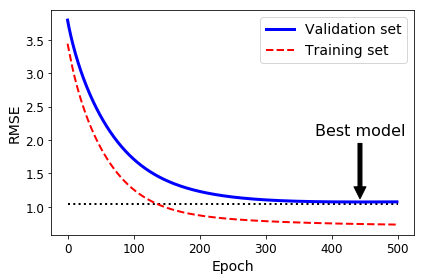

In [156]:
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [159]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter = 1,
                      tol = -np.infty,
                      warm_start = True,
                      penalty = None,
                      learning_rate = "constant",
                      eta0= .0005, random_state =42)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [160]:
best_epoch,best_model

(443,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
        verbose=0, warm_start=True))

In [161]:
t1a, t1b, t2a,t2b = -1,3,-1.5,1.5
#ignoring the bias term

t1s = np.linspace(t1a,t1b,500)
t2s = np.linspace(t2a,t2b,500)
t1,t2 = np.meshgrid(t1s,t2s)
T = np.c_[t1.ravel(),t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

Saving figure lasso_vs_ridge_plot


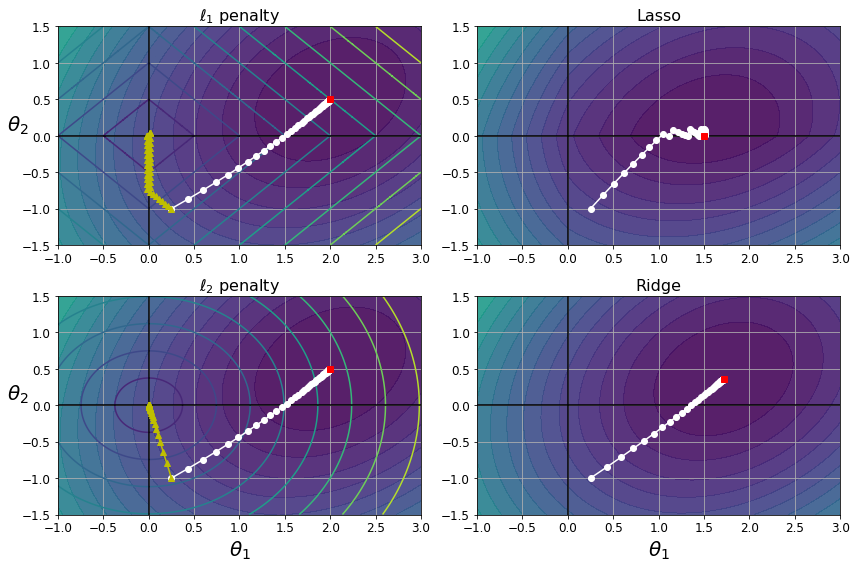

In [162]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

save_fig("lasso_vs_ridge_plot")
plt.show()

# Logistic Regression


Saving figure logistic_function_plot


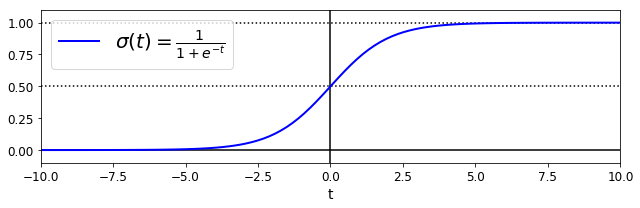

In [165]:
t = np.linspace(-10,10,100)
sig = 1/(1 + np.exp(-t))
plt.figure(figsize = (9,3))
plt.plot([-10,10],[0,0],"k-")
plt.plot([-10,10],[.5,.5],"k:")
plt.plot([-10,10],[1,1],"k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t,sig,"b-",linewidth=2,label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [168]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [171]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [189]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

In [190]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [193]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42,solver='liblinear')

In [194]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [207]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)


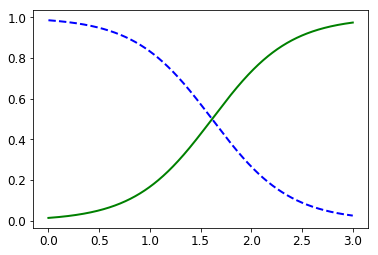

In [199]:
plt.plot(X_new,y_proba[:,1], "g-",linewidth=2,label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0], "b--",linewidth=2,label="Not Iris-Virginica")

Saving figure logistic_regression_plot


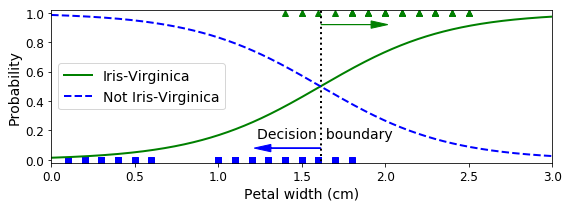

In [204]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [205]:
decision_boundary

array([1.61561562])

In [206]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

In [217]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:,(2,3)]
y = (iris["target" ]== 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear",C=10**10,random_state = 42)        
log_reg.fit(X,y)

#Creating our new data

x0,x1 = np.meshgrid(
        np.linspace(2.9,7,500).reshape(-1,1),
        np.linspace(0.8,2.7,200).reshape(-1,1),
    )
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

Saving figure logistic_regression_contour_plot


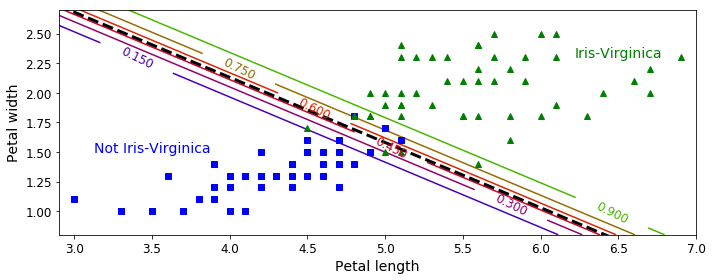

In [218]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [219]:
X = iris["data"][:,(2,3)] 
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver = "lbfgs", C = 10,random_state =42)
softmax_reg.fit(X,y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Saving figure softmax_regression_contour_plot


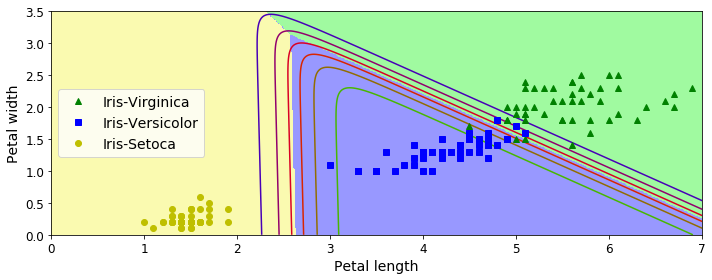

In [224]:
x0,x1 = np.meshgrid(
        np.linspace(0,8,500).reshape(-1,1),
        np.linspace(0,3.5,200).reshape(-1,1))

X_new = np.c_[x0.ravel(),x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize = (10,4))
plt.plot(X[y==2, 0], X[y==2,1], "g^", label = "Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1,1], "bs", label = "Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0,1], "yo", label = "Iris-Setoca")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0,x1,zz, cmap = custom_cmap)
contour = plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize =14)
plt.axis([0,7,0,3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# Exercises

In [225]:
# 1. What Linear Regression training algorithm can you use if you have a training set with millions of features?
"""
    probably: stochastic gradient descent or Mini batch gradient descent can be used. 
    Cannot use Normal Equation since the computaional complexity grows quickly
"""

In [226]:
# 2. Suppose the features in your training set ahve very different scales. What algorithms might suffer from this and how?
# what can you do about it?
"""
    Since the data different in scales, the cost function will have the shape of elongate bowl. Then to solve this problem, 
    we simply scale the data before traning the model
"""

'\n    Since the data different in scales, the cost function will have the shape of elongate bowl. Then to solve this problem, \n    we simply scale the data before traning the model\n'

In [ ]:
#Do all Gradient Descent Algorithms lead to the same model provided you let them run long enough
"""
  Yes. If the optimization problem is convex such as Linear Regression or Logistic Regression, if we give the model
  a small or slow learning rate, all of the GD algorithms will aproach the global optimum and end up producing the same 
  result. However, unless you gradually reduce the learning rate, stochastic GD and Mini-batch GD will never truly converge,
  instead, they will keep jumping back and forth around the global minimum.
"""

In [ ]:
#Suppose you use Batch Gradient Descent and you plot the validation
#error at every epoch. If you notice that the validation error consistently
#goes up, what is likely going on? How can you fix this?
"""
    If the validation error consistently goes up it means that the learning rate is too high 
    and we should reduce it.
"""

In [228]:
#Is it a good idea to stop Mini-batch Gradient Descent immediately when
#the validation error goes up?

"""
    Due to the random in nature of Stochastic and mini batch gradient descent, there is no guarantee that 
    the result it provide in a single interval is an optimized one. Therefor, it's not a good idea to  so.
    One option is that we should save or record that moment and then let the model continue and wait until
    the validation error not changing any more then go back and take that point.
"""

"\n    Due to the random in nature of Stochastic and mini batch gradient descent, there is no guarantee that \n    the result it provide in a single interval is an optimized one. Therefor, it's not a good idea to  so.\n    One option is that we should save or record that moment and then let the model continue and wait until\n    the validation error not changing any more then go back and take that point.\n"

In [ ]:
#Suppose you are using Polynomial Regression. You plot the learning
#curves and you notice that there is a large gap between the training error
#and the validation error. What is happening? What are three ways to
#solve this?

"""
    This is seem to be an overfitting problem in this case. Normally, to handle these situation, we will try to 
    simplify the model and in this case is to lower a the degree of freedom. Another way is to regulized the model
    using the LASSO or Grid Regression. Lastly, we can also try to train the model with larger training dataset.
"""

In [ ]:
# Why Linear Regression < Ridge Regression
"""
    A model wil some regularization typically performs better than a model without it. 
"""

In [2]:
# EXERCISE 12
#Implement Batch Gradient Descent with early stopping for Softmax Regression
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [5]:
X = iris["data"][:,(2,3)]
y = iris["target"]

In [88]:
#Adding bias term in every X0
import numpy as np

X_with_bias = np.c_[np.ones([len(X), 1]), X] #np.c_ concatenate 2 np array

In [89]:
X_with_bias

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.1, 0.1],
       [1. , 1.2, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.3, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.7, 0.3],
       [1. , 1.5, 0.3],
       [1. , 1.7, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1. , 0.2],
       [1. , 1.7, 0.5],
       [1. , 1.9, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.4],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.5, 0.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.2, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.3, 0.3],
       [1. , 1.3

In [90]:
np.random.seed(2042)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# We can also try to implement this function by hand
test_ratio = .2
validation =  .2
total_size = len(X_with_bias)

test_size = int(total_size*test_ratio)
validation_size = int(total_size*validation)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

In [93]:
X_train = X_with_bias[rnd_indices[:train_size,]]
X_valid = X_with_bias[rnd_indices[train_size:-validation_size]]
X_test  = X_with_bias[rnd_indices[(train_size+validation_size):]]

y_train = y[rnd_indices[:train_size]]
y_valid = y[rnd_indices[train_size:-validation_size]]
y_test  = y[rnd_indices[(train_size+validation_size):]]

In [94]:
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0,1,2) but we need target class probability to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0. Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance.

In [95]:
def to_one_hot(y):
    m = len(y)
    n_classes = y.max()+1
    Y_one_hot = np.zeros((m,n_classes))
    Y_one_hot[np.arange(m),y] = 1
    return Y_one_hot

In [96]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [97]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [98]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [99]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps,axis =1 , keepdims = True)
    return exps/exp_sums

In [100]:
n_inputs = X_train.shape[1] # =3 (2 attributes + 1 bias term)
n_outputs = len(np.unique(y_train)) # =3 (3 types of IRIS)

In [101]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

# OUt theta
Theta = np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logist = X_train.dot(Theta)
    Y_proba = softmax(logist)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    error = Y_proba - Y_train_one_hot
    if iteration%500 == 0:
        print("The error at iteration ",iteration , " is: " ,loss)
    gradients = 1/m*X_train.T.dot(error)
    Theta = Theta - gradients*eta

The error at iteration  0  is:  5.446205811872683
The error at iteration  500  is:  0.39552070804530204
The error at iteration  1000  is:  0.30749414568128003
The error at iteration  1500  is:  0.26256255969970377
The error at iteration  2000  is:  0.23337617569271762
The error at iteration  2500  is:  0.21239528202854902
The error at iteration  3000  is:  0.19641813232162886
The error at iteration  3500  is:  0.18377357309797848
The error at iteration  4000  is:  0.17347984352857318
The error at iteration  4500  is:  0.16491433684690535
The error at iteration  5000  is:  0.15766023346812316


In [102]:
Theta

array([[ 8.43265194,  1.08153825, -9.84315298],
       [-2.00513502,  0.2494366 ,  0.80598907],
       [-2.5683867 , -0.86904814,  4.1185525 ]])

In [103]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [104]:
#Let add some regulization and l2 norm to the function
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

Theta = np.random.randn(n_inputs,n_outputs)

for iteration in range (n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2*np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha*l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration%500 == 0:
        print("The loss at iteration ", iteration ," is ", loss)
    gradients = 1/m*X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - gradients*eta

The loss at iteration  0  is  6.629842469083912
The loss at iteration  500  is  0.5339667976629506
The loss at iteration  1000  is  0.503640075014894
The loss at iteration  1500  is  0.49468910594603216
The loss at iteration  2000  is  0.4912968418075477
The loss at iteration  2500  is  0.48989924700933296
The loss at iteration  3000  is  0.48929905984511984
The loss at iteration  3500  is  0.48903512443978603
The loss at iteration  4000  is  0.4889173621830818
The loss at iteration  4500  is  0.4888643337449303
The loss at iteration  5000  is  0.4888403120738818


In [105]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [106]:
# Now let get early stopping

In [107]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration%500 == 0:
        print("The loss at iteration ", iteration ," is ", loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

The loss at iteration  0  is  4.7096017363419875
The loss at iteration  500  is  0.5739711987633519
The loss at iteration  1000  is  0.5435638529109127
The loss at iteration  1500  is  0.5355752782580262
The loss at iteration  2000  is  0.5331959249285544
The loss at iteration  2500  is  0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327975 early stopping!


In [108]:

logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

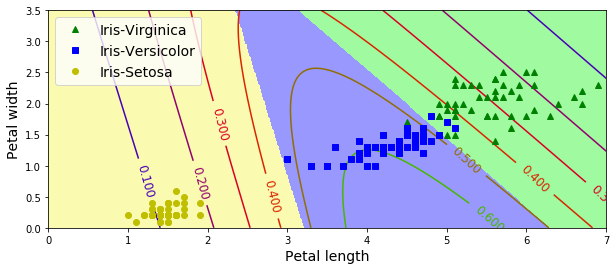

In [111]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [112]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333